In [2]:
import networkx as nx

In [3]:
# making a graph and adding some nodes to it
g = nx.Graph()
g.add_node(5)
g.add_nodes_from(range(6))
print(g)

Graph with 6 nodes and 0 edges


[10, 11]


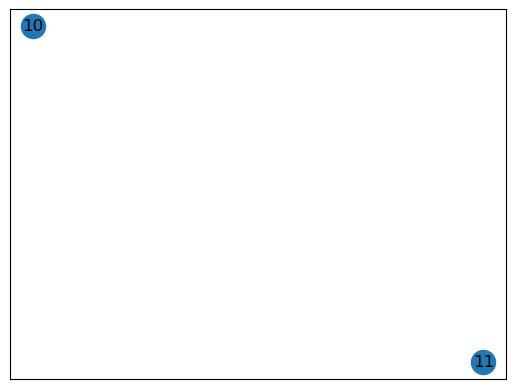

In [4]:
# making a graph and adding some entitle nodes to it
g1 = nx.Graph()
g1.add_nodes_from([
    (10, {'color':'blue', 'lenght':1.5}),
    (11, {'color':'red','lenght':1})
                    ])
print(g1.nodes)
pos = nx.spring_layout(g1, weight='w', iterations=250)
nx.draw_networkx(g1, pos=pos)

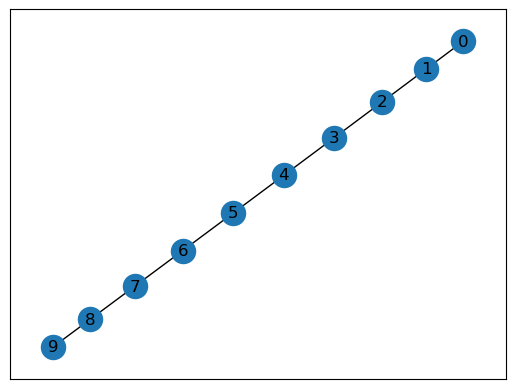

In [5]:
# path graph

h = nx.path_graph(10)
pos = nx.spring_layout(h, weight='w', iterations=250)
nx.draw_networkx(h, pos=pos)

[10, 11, <networkx.classes.graph.Graph object at 0x000001BDC43D8730>]


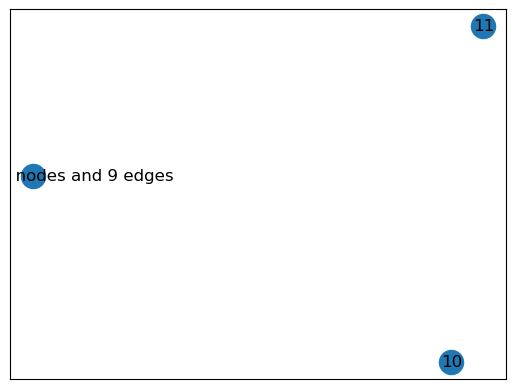

In [6]:
g1.add_node(h)
print(g1.nodes)
pos = nx.spring_layout(g1, weight='w', iterations=250)
nx.draw_networkx(g1, pos=pos)

[10, 11, <networkx.classes.graph.Graph object at 0x000001BDC43D8730>, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


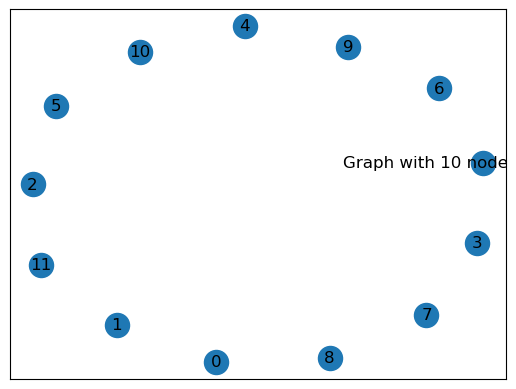

In [7]:
# adding a graph to another graph either as a node or
# using its node in another graph

g1.add_nodes_from(h)
print(g1.nodes)
pos = nx.spring_layout(g1, weight='w', iterations=250)
nx.draw_networkx(g1, pos=pos)

[(1, 4), (5, 6), (6, 11), (8, 7)]
0.1
1.0
0.16666666666666666
0.25
Graph with 7 nodes and 4 edges


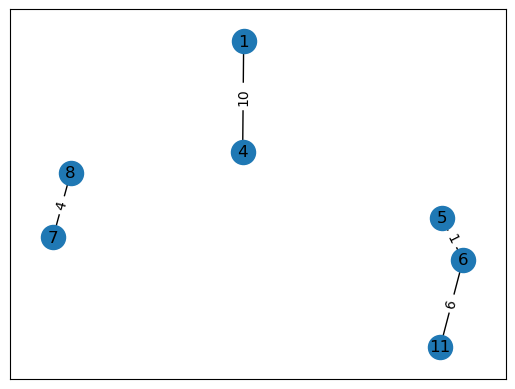

In [8]:
# adding edges
# there are several ways that we can add edges but the only 
# way that I could find to add attributes is add_edges_from()

#g1.add_edge(1, 2,{'d': 5})

g1 = nx.Graph()
g1.add_edges_from([
    (1, 4, {'d': 10}),
    (5, 6, {'d': 1}),
    (8, 7, {'d': 4}),
    (6, 11, {'d': 6})
    ])

#e =(3,10, {'d': 9})
#g1.add_edge(*e)

print(g1.edges)

# Adding different wights to each edge
for edge in g1.edges:
    distance = g1.edges[edge]['d']
    g1.edges[edge]['w'] = 1/distance
    print(g1.edges[edge]['w'])

print(g1)

# drawing the graph
pos = nx.spring_layout(g1, weight='w')
nx.draw_networkx(g1, pos=pos)
nx.draw_networkx_edge_labels(g1, pos=pos, edge_labels=nx.get_edge_attributes(g1, 'd'));

Graph with 9 nodes and 3 edges


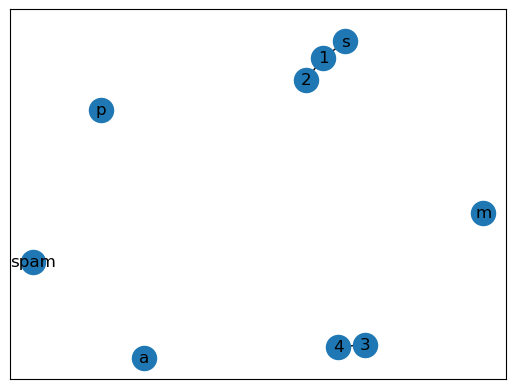

In [9]:
# here I want to check the consistancy of a graph in networkX
g1.clear()
g1.add_edges_from([(1,2), (3,4)])
g1.add_node(1)
g1.add_edge(1,2)
g1.add_node('spam')
g1.add_nodes_from('spam')
g1.add_edge(1,'s')
print(g1)
pos = nx.spring_layout(g1, weight='w')
nx.draw_networkx(g1, pos=pos)

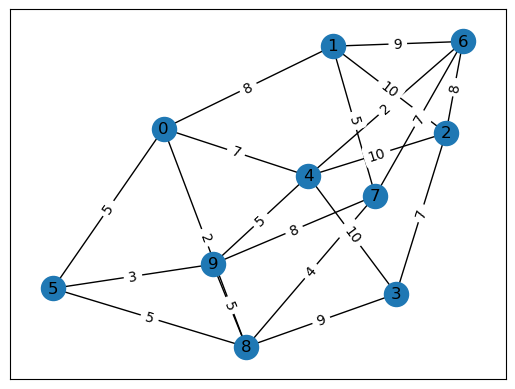

In [61]:
# Erdős–Rényi model refers to one of two closely related models for 
# generating random graphs or the evolution of a random network.In 
# the model of Erdős and Rényi, all graphs on a fixed vertex set 
# with a fixed number of edges are equally likely.

import networkx as nx
import random

# creating a Erdős–Rényi random graph
g = nx.gnm_random_graph(10,20)

# assigning random weights to different edges
for (u, v) in g.edges():
    g.edges[u,v]['weight'] = random.randint(1,10)
    #print(g.edges[u,v])

# sketch the graph
pos = nx.spring_layout(g, weight='weight')
nx.draw_networkx(g, pos=pos)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'weight'));

In [ ]:
# some practical codes

#a = list(h[0].values())[0]
#a
#list(a[0].values())[0]
h[0]
a = nx.get_edge_attributes(h, 'weight')
#a = nx.get_edge_attributes(h, 'weight')
#print(a)

for edge in h.edges(3):
    print(edge)

    #print(edge)

for neighbour in h[0]:
    print(h[0][neighbour])
    print((0,neighbour))

print(dict(h[0]))

# Tuterial NetworkX

In [20]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np

In [21]:
# make different types of graphs
g = nx.Graph()
h = nx.DiGraph()
j = nx.MultiGraph()
k = nx.MultiDiGraph()

In [ ]:
# simple undirected one and adding each node and edge with a command
g.clear()
g.add_node(1)
print(g)

# if we add an edge without adding adding its nodes before, the networkX will add them automatically
g.add_edge(1, 2)
print(g)
g.add_edge(2, 3, weight=5)
print(g)

# because g is hashable, I can add any kind of variable to this graph
# basically, we can pass anything that is an object in python
g.add_edge('A', 'B')
g.add_edge('B','B')
g.add_node('C')
print(g)

# we can even add a function as a node in a graph
g.add_node(print)
print(g)

# we have different embedding methods to sketch(draw) a graph in networkX

# first method
#nx.draw_networkx(g)

# second method
nx.draw_spring(g, with_labels=True)


In [ ]:
# simple undirected one and adding nodes and edges from a list with a command


edge_list = [(1,2), (2,3), (3,4), (3,5), (4,6), (6,7)]

# this is a way of using a list
g.clear()
g = nx.from_edgelist(edge_list)
print(g)

# the second way of using a list
g.clear()
g = nx.Graph()
g.add_edges_from(edge_list)

# we can make an adjecency matrix for a graph as well
adj_matrix = nx.adjacency_matrix(g)
print(adj_matrix)

# also, we can use numpy array to make a matrix
#g.clear()
#g = nx.from_numpy_array(np.array([[0, 1, 0],
#                                 [1, 1, 1],
#                                 [0, 0, 0]]))

# now we can adjust different types of graph presentation 
# spring mode
nx.draw_spring(g, with_labels=True)
plt.show()

# circular mode
nx.draw_circular(g, with_labels=True)
plt.show()

# shell mode (concentric circle)
nx.draw_shell(g, with_labels=True)
plt.show()

# spectral mode (this is based on Laplacian)
nx.draw_spectral(g, with_labels=True)
plt.show()

# random mode (produce a random representation)
nx.draw_random(g, with_labels=True)
plt.show()

# planar mode (in which the edges do NOT intersect)
nx.draw_planar(g, with_labels=True)
plt.show()

Graph with 4 nodes and 6 edges


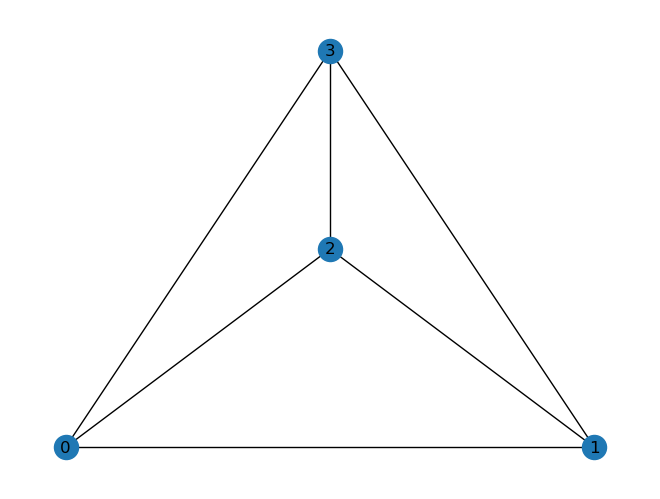

In [85]:
# here we want to investigate some properties of planer embedding


# make a complete graph
g.clear()
g = nx.complete_graph(4)
print(g)

# draw it in the planar form
nx.draw_planar(g, with_labels=True)
plt.show()




(1, 1)
(2, 2)
(3, 3)
(4, 2)
(5, 1)
(6, 2)
(7, 1)
{1: 1, 2: 2, 3: 3, 4: 2, 5: 1, 6: 2, 7: 1}
the shortest path: [2, 3, 4]


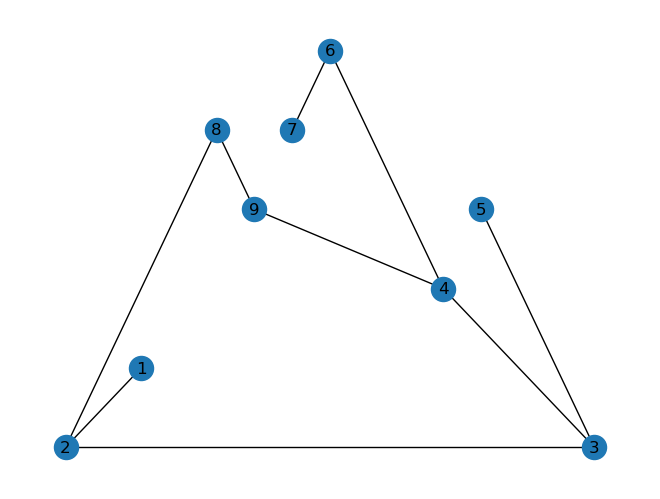

DIRECTED GRAPH: DiGraph with 7 nodes and 6 edges
[(1, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
[(1, 1), (2, 1), (3, 2), (4, 1), (5, 0), (6, 1), (7, 0)]
[(1, 1), (2, 2), (3, 3), (4, 2), (5, 1), (6, 2), (7, 1)]


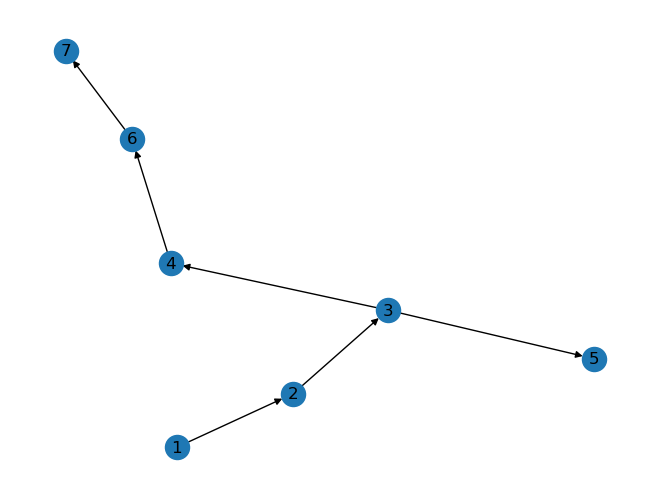

In [139]:
# also, here I will use some commands to find a graph's features

# make a graph
g.clear()
edge_list = [(1,2), (2,3), (3,4), (3,5), (4,6), (6,7)]
g = nx.Graph()
g.add_edges_from(edge_list)

# get the degree of a graph
degree = g.degree

# if we loop over a graph degree, it gives us a tupil that the first component 
# is the node name and the second is the degree of that node
for x in degree:
    print(x)

# also, we can change the degree type into a dict
degree_dict = dict(degree)
print(degree_dict)

# we can find the shortest path for this undirected graph betwwen any two nodes
g.add_edges_from([(2,8), (8,9), (9,4)])
#g.remove_edge(2,3) # we can remove an edge with this command
shortes_path = nx.shortest_path(g, 2, 4)
print(f'the shortest path: {shortes_path}')
nx.draw_planar(g, with_labels=True)
plt.show()

# we can do this for directed graph as well
h.clear()
h = nx.DiGraph()
h.add_edges_from(edge_list)
print(f'DIRECTED GRAPH: {h}')

# now we can find its in_degree and out_degree. Again, here we have a list of 
# tupils that can be used everywhere
in_degree = h.in_degree
print(in_degree)
out_degree = h.out_degree
print(out_degree)
nx.draw_spring(h, with_labels=True)
degree_directed = h.degree
print(degree_directed)

degre: {1: 0.125, 2: 0.375, 3: 0.375, 4: 0.375, 5: 0.125, 6: 0.25, 7: 0.125, 8: 0.25, 9: 0.25}
closeness: {1: 0.34782608695652173, 2: 0.5, 3: 0.5714285714285714, 4: 0.5714285714285714, 5: 0.38095238095238093, 6: 0.42105263157894735, 7: 0.3076923076923077, 8: 0.4444444444444444, 9: 0.47058823529411764}
eigenvenctor: {1: 0.18634000990912158, 2: 0.4306903185756072, 3: 0.4739812530870786, 4: 0.4597529524154018, 5: 0.20507095531384703, 6: 0.24472863629884894, 7: 0.10588469511122339, 8: 0.33513731189945295, 9: 0.3439148965014726}
betweenness: {1: 0.0, 2: 0.3214285714285714, 3: 0.46428571428571425, 4: 0.5, 5: 0.0, 6: 0.25, 7: 0.0, 8: 0.07142857142857142, 9: 0.10714285714285714}
[0, 1, 2, 3, 4, 'A', 'B', 'C', 'D', 'E', 'X']
betweenness: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.5333333333333333, 'A': 0.5333333333333333, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'X': 0.5555555555555556}


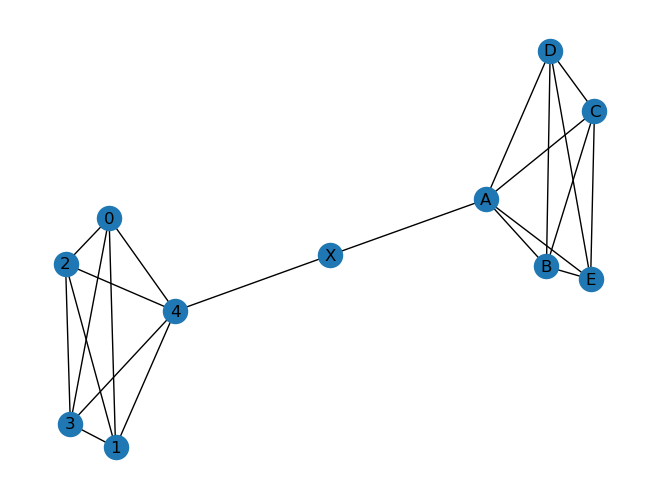

In [167]:
# here, I want to explain an important concept via NetwokX which is CENTRALITY.
# we have different kinds of centrality such as degree, closeness, eigenvector, between centralities and so on
# we should determine what kinds of centrality does we want to check
# degree centrality: a node with highest degree is a central node
# closeness centrality: a node with avarage distance (shortest path) to all the other nodes
# eigenvalue centrality: it cares about the importance of the nodes that a node is connected to. For directed 
# graphs this is “left” eigenvector centrality which corresponds to the in-edges in the graph. For out-edges 
# eigenvector centrality first reverse the graph with G.reverse().
# between centrality: how much percentages of the shortest paths run through a node

# basically, NetworkX has all the relavant functions for each of these centralities
# degree centrality
degree_centrality = nx.degree_centrality(g)
print(f'degre: {degree_centrality}')

# closeness centrality
closeness_centrality = nx.closeness_centrality(g)
print(f'closeness: {closeness_centrality}')

# eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(g)
print(f'eigenvenctor: {eigenvector_centrality}')

# betweenness centrality
betweenness_centrality = nx.betweenness_centrality(g)
print(f'betweenness: {betweenness_centrality}')


# we can compare these centrality methods with each other by using a complete graph
g1.clear()
g2.clear()
g1 = nx.complete_graph(5)
g2 = nx.complete_graph(5)

# relabel nodes of g2 
g2 = nx.relabel_nodes(g2,{0:'A', 1:'B', 2:'C', 3:'D', 4:'E'})

# make a bridge graph between these two graphs
g_connector = nx.from_edgelist([(4,'X'), ('X','A')])

# combine all parts together to make a graph with two communities
g_community = nx.compose_all([g1, g2, g_connector])
print(g_community.nodes)
betweenness_centrality = nx.betweenness_centrality(g_community)
print(f'betweenness: {betweenness_centrality}')
nx.draw_spring(g_community, with_labels=True)
plt.show()

density: 0.4
diameter: 4
radius: 2
eulerian path: [(4, 0), (0, 1), (1, 2), (2, 0), (0, 3), (3, 1), (1, 4), (4, 2), (2, 3), (3, 4), (4, 'X'), ('X', 'A'), ('A', 'B'), ('B', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'B'), ('B', 'E'), ('E', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A')])
[['B', 'A', 'C', 'D', 'E'], [4, 0, 1, 2, 3], [4, 'X'], ['A', 'X']]
k_core: Graph with 10 nodes and 20 edges


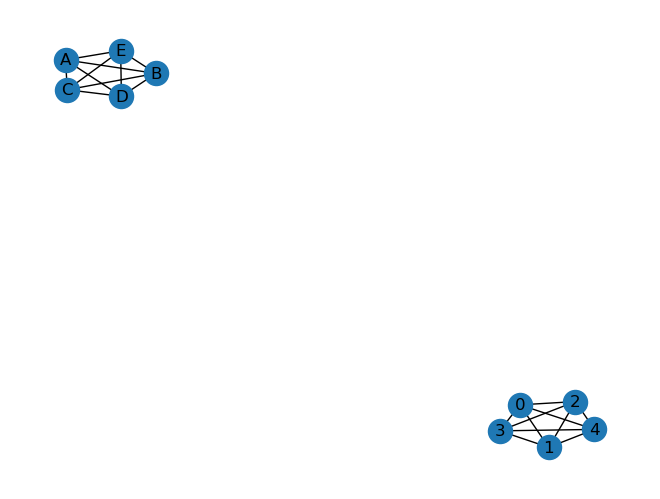

In [161]:
# we can get some basic attributes about our graph
# density: it is the proportion of the number of edges per the maximum number of possible edges in a graph G
density = nx.density(g_community)
print(f'density: {density}')

# diameter: max (eccentricity)
diameter = nx.diameter(g_community)
print(f'diameter: {diameter}')

# radius: min (eccentricity)
radius = nx.radius(g_community)
print(f'radius: {radius}')

# Eulerian path: is a path that goes thruogh all the edges once. It should be turned into a list for visualisation
eulerian_path = nx.eulerian_path(g_community)
print(f'eulerian path: {list(eulerian_path)})')

# clique: a complete subgraph of a graph is a clique
cliques = nx.find_cliques(g_community)
print(list(cliques))

# k_core: A k-core is a maximal subgraph that contains nodes of degree k or more. (it gives a graph)
k_core = nx.k_core(g_community)
print(f'k_core: {k_core}')
nx.draw_spring(k_core, with_labels=True)
plt.show()


bridges: []
local bridges: [(4, 'X', 5), (4, 'F', 5), ('A', 'X', 5), ('A', 'H', 5), ('F', 'G', 5), ('G', 'H', 5)]


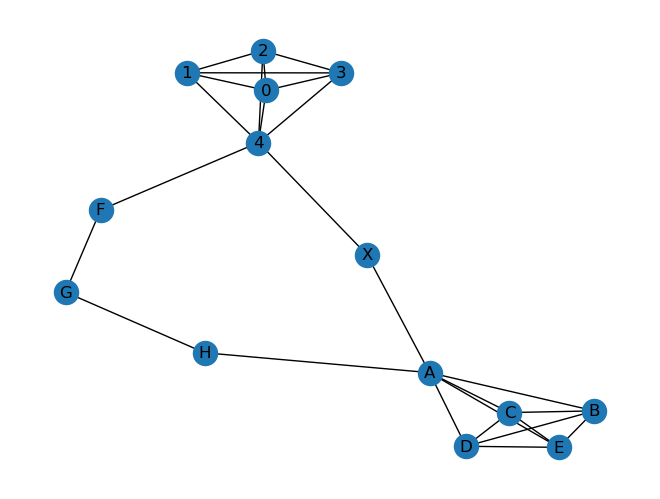

In [166]:
# in this part, I want to show how we can find bridges
# bridge: Is an edge when deleted increase the number of connected components
bridges = nx.bridges(g_community)
print(f'bridges: {list(bridges)}')

# local bridge: when we have edges between two nodes and they don't have any common neighbor. 
# so by removing these edges we will not make connected components. we just cut the edge of two
#  nodes that do not have any mutual neighbors so the only thing which matter here is that there
#  will be a longer shortest path between these two nodes
g_community.add_edges_from([(4,'F'), ('F','G'), ('G','H'), ('H','A')])
local_bridges = nx.local_bridges(g_community)
print(f'local bridges: {list(local_bridges)}')
nx.draw_spring(g_community, with_labels=True) # the last number is the new shortest path between these two nodes
plt.show()

because the whole graph is a connected component we get
connected components: [{0, 1, 2, 3, 4}, {'B', 'A', 'D', 'C', 'E'}, {'X'}]


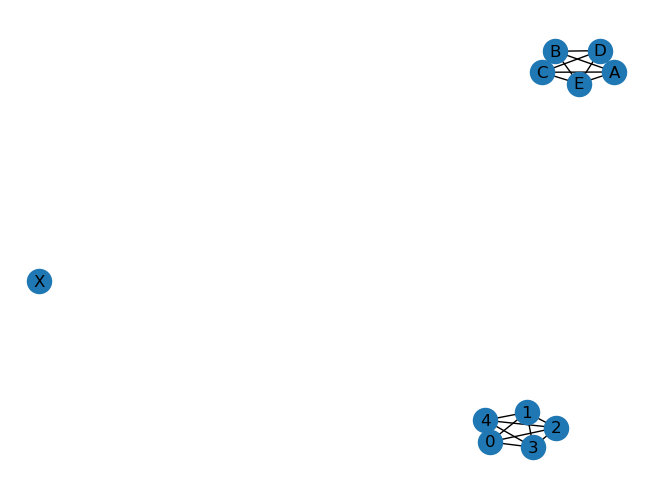

connected components: [{0, 1, 2, 3, 4}, {'B', 'A', 'D', 'C', 'E'}, {'X'}]


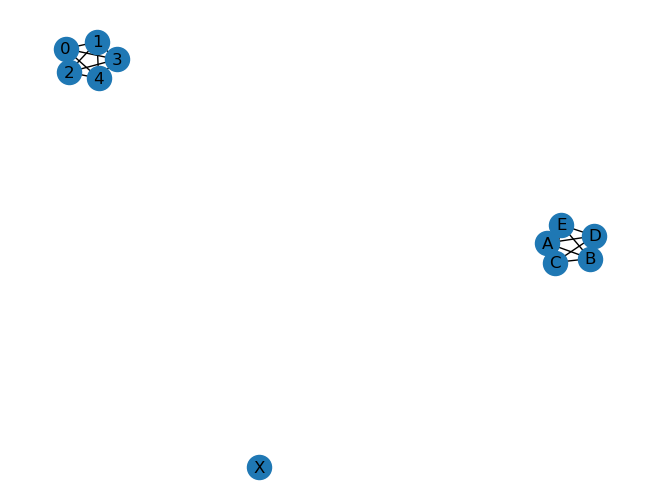

NetworkXNotImplemented: not implemented for undirected type

In [175]:
# the last thing that we will do is to list connected components
# finding connected componenets
connected_components = nx.connected_components(g_community)
print(f'because the whole graph is a connected component we get\nconnected components: {list(connected_components)}')
nx.draw_spring(g_community, with_labels=True)
plt.show()
g_community.remove_edges_from([(4,'X'), ('X','A')])
connected_components = nx.connected_components(g_community)
print(f'connected components: {list(connected_components)}')
nx.draw_spring(g_community, with_labels=True)
plt.show()

# we can investigate weakly connected components and strongly connected components.
# these two concepts are used in directed graphs. is we cannot go from any node to
# another in a directed graph we can call it weakly connceted component; otherwise,
#  we can call it strongly connected component
weakly = nx.weakly_connected_components(g_community)
strongly = nx.strongly_connected_components(g_community)
